AISHWARYA S - 
22MCB0006

In [ ]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Label Propagation algorithm

<ipython-input-30-36046c9bc73f>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(label_propagation_communities))


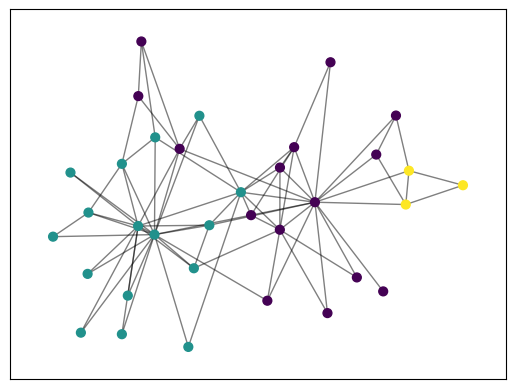

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the karate club graph
G = nx.karate_club_graph()

# Perform community detection using Label Propagation algorithm
label_propagation_communities = nx.algorithms.community.label_propagation_communities(G)

# Create a community mapping
community_mapping = {}
for i, community in enumerate(label_propagation_communities):
    for node in community:
        community_mapping[node] = i

# Draw the graph
pos = nx.spring_layout(G)
colors = [community_mapping[node] for node in G.nodes]
cmap = plt.cm.get_cmap('viridis', len(label_propagation_communities))

nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=cmap, node_size=40)
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()


In [ ]:
pip install infomap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.1/263.1 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for infomap: filename=infomap-2.7.1-cp310-cp310-linux_x86_64.whl size=8808857 sha256=83fbf783b213ce25c3242ff2e281b78f0306fdf45d44ddcf0139dabf855297bc
  Stored in directory: /root/.cache/pip/wheels/e4/01/53/fd7c62079098140cd582b999592b4592c0dad7300cac32b6e1
Successfully built infomap


Infomap Algorithm

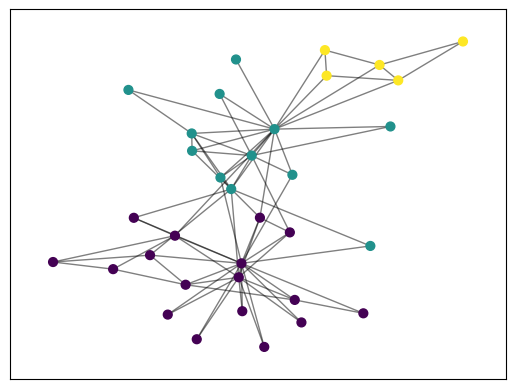

In [ ]:
import networkx as nx
from infomap import Infomap

# Load the karate club graph
G = nx.karate_club_graph()

# Create the Infomap instance
infomap_instance = Infomap()

# Add nodes to the Infomap instance
for node in G.nodes:
    infomap_instance.add_node(node)

# Add edges to the Infomap instance
for edge in G.edges:
    infomap_instance.add_link(*edge)

# Run the Infomap algorithm
infomap_instance.run()

# Get the communities from the Infomap instance
communities = infomap_instance.get_modules()

# Draw the graph
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=40, node_color=list(communities.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Louvian Algorithm

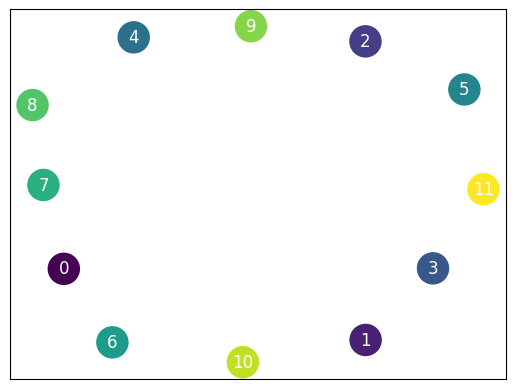

In [ ]:
import os
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from community import community_louvain
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Step 1: Load the text dataset
# Assuming you have a .txt file named 'dataset.txt' containing one document per line
with open('/content/group.csv', 'r') as file:
    documents = file.readlines()

# Step 2: Preprocess the text data
stop_words = set(stopwords.words('english'))  # Set of stopwords
processed_documents = []
for document in documents:
    # Tokenize the document into words
    tokens = word_tokenize(document.lower())
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Join the processed tokens back into a document string
    processed_document = ' '.join(tokens)
    processed_documents.append(processed_document)

# Step 3: Create a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_documents)

# Step 4: Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5)  # Assuming 5 topics
lda.fit(X)

# Step 5: Extract topic distributions for documents
topic_dist = lda.transform(X)
topic_labels = topic_dist.argmax(axis=1)

# Step 6: Create a graph representation of the documents
G = nx.Graph()
for i, document in enumerate(processed_documents):
    G.add_node(i, text=document, topic=topic_labels[i])

# Step 7: Apply the Louvain algorithm for community detection
partition = community_louvain.best_partition(G)

# Step 8: Visualize the graph with community colors
pos = nx.spring_layout(G)

# Get unique community labels
community_labels = set(partition.values())

# Draw nodes with different community colors
node_colors = [partition[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='viridis', node_size=500)

# Draw edges with community colors
edge_colors = ['blue' if partition[edge[0]] != partition[edge[1]] else 'viridis' for edge in G.edges()]
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color=edge_colors)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_color='white')

# Show the plot
plt.axis('on')
plt.show()


Girvan_newman Algorithm

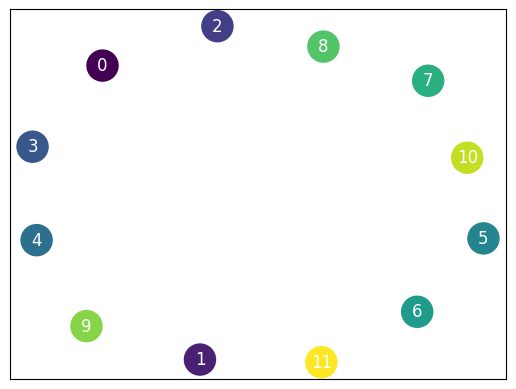

In [ ]:
import os
import networkx as nx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Step 1: Load the text dataset
with open('/content/group.csv', 'r') as file:
    documents = file.readlines()

# Step 2: Preprocess the text data
stop_words = set(stopwords.words('english'))  # Set of stopwords
processed_documents = []
for document in documents:
    # Tokenize the document into words
    tokens = word_tokenize(document.lower())
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Join the processed tokens back into a document string
    processed_document = ' '.join(tokens)
    processed_documents.append(processed_document)

# Step 3: Create a document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Step 4: Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5)  # Assuming 5 topics
lda.fit(X)

# Step 5: Extract topic distributions for documents
topic_dist = lda.transform(X)
topic_labels = topic_dist.argmax(axis=1)

# Step 6: Create a graph representation of the documents
G = nx.Graph()
for i, document in enumerate(documents):
    G.add_node(i, text=document, topic=topic_labels[i])

# Step 7: Apply the Girvan-Newman algorithm for community detection
communities = nx.community.girvan_newman(G)

# Step 8: Get the final community partition
partition = next(communities)

# Step 9: Visualize the graph with community colors
pos = nx.spring_layout(G)

# Draw nodes with different community colors
node_colors = [idx for idx, comm in enumerate(partition) for _ in comm]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='viridis', node_size=500)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_color='white')

# Show the plot
plt.axis('ON')
plt.show()
